<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**
*From scratch using Python*

Logistic Regression is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable.

### Importing necessary libraries:
Numpy, pandas and matplotlib.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Using Google Drive Mount to access dataset files.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data Frame

The famous library 'pandas' is used to load the data frame from the csv files provided.

Data Frame for training dataset.

In [22]:
pd.options.display.max_columns = 5
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-train.csv', header = None)
df_train.head()

,0,1,...,783,784
0,23,0,...,0,0
1,7,0,...,0,0
2,16,0,...,0,0
3,15,0,...,0,0
4,23,0,...,0,0


Data Frame for testing dataset.

In [23]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-test.csv', header = None)
df_test.head()

,0,1,...,783,784
0,1,0,...,0,0
1,1,0,...,0,0
2,1,0,...,0,0
3,1,0,...,0,0
4,1,0,...,0,0


An array of alphabets with 'A' at index 0 and 'Z' at index 25 to better understand which alphabet is being shown and predicted.

In [24]:
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

## Visualising the data
We'll map the pixel brightness with the help of matplotlib and create the image of the alphabets on a graph.

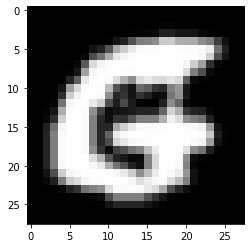

In [25]:
n=df_train.shape[1]
pixels=(df_train.iloc[1:2,1:n]).to_numpy()
pixels = pixels.reshape((28, 28))
pixels = pixels.T
plt.imshow(pixels, cmap='gray')
plt.show()

## Converting the Data Frame to NumPy Arrays

Using the function `.to_numpy()` to conver the Data Frame to numpy array and then slicing the array to separate features from the label.

`X_train` --> Array with all features of training dataset.

`Y_train` --> Array with all labels of training dataset.

`X_test` --> Array with all features of testing dataset.

`Y_test` --> Array with all labels of testing dataset.

In [26]:
X_train = df_train.to_numpy()
Y_train = X_train[:, 0]
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_train = X_train[:, 1:X_train.shape[1]]

In [27]:
X_test = df_test.to_numpy()
Y_test = X_test[:, 0]
Y_test = Y_test.reshape(Y_test.shape[0],1)
X_test = X_test[:, 1:X_test.shape[1]]

Defining a function `plot` which will be used to map the brightness of the pixels onto a graph thus showing the alphabet.

In [28]:
def plot(X):
    pixels = X.reshape((28, 28))
    pixels = pixels.T
    plt.imshow(pixels, cmap='gray')
    plt.show()

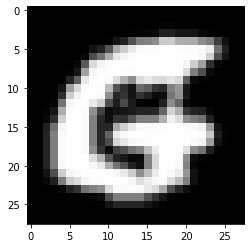

This is G


In [29]:
n=X_train.shape[1]
a = 1
pixels= X_train[a:a+1, :]
plot(pixels)
print('This is', alphabets[Y_train[a]-1][0])

No. of unique classes in the training dataset.

In [30]:
print(np.unique(Y_train))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


## Normalising the Data:
The maximum pixel brightness is 255 and the minimum us 0. So we'll divide the whole array by 255 to get all the entries between 0 and 1.

In [31]:
def normalise(X):
    result = X/255
    return result

## Sigmoid Function:

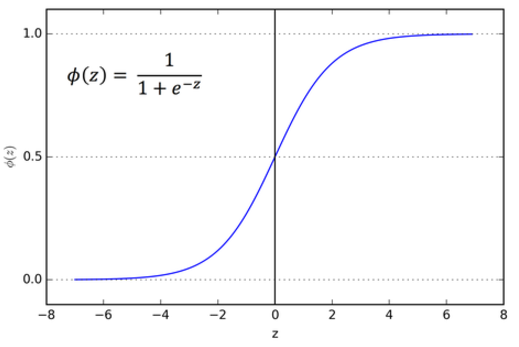

In [32]:
def sigmoid(X):
    result = 1/(1+np.exp(-X))
    return result

## Cost Function:
Here, `m` is the number of training examples, `y` is the label given and `h(x)` is the label predicted by the model.

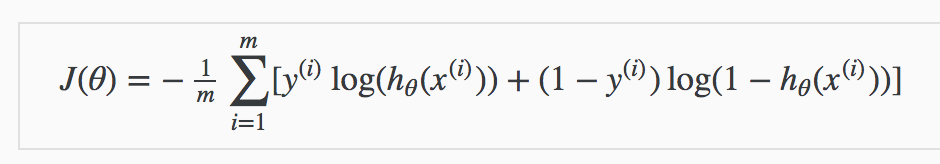

In [33]:
def cost_function(X, Y, theta):
    m = Y.shape[0]                      # No. of training examples
    Y_pred = sigmoid(np.dot(X, theta.T))
    result = (np.sum(-np.dot(Y.T, np.log(Y_pred + 10**(-7))) - np.dot((1-Y).T, np.log(1-Y_pred + 10**(-7))), axis = 1))
    result = result.reshape(result.shape[0], 1)
    return result

## Gradient Descent Function:

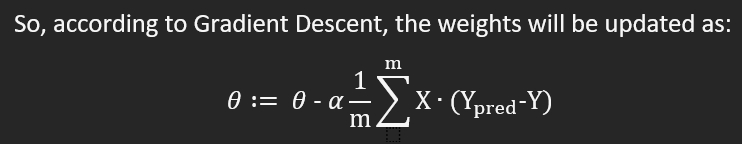

In [34]:
def gradient_descent(X, Y, theta, learning_rate):
    m = Y.shape[0]                      # No. of training examples
    Y_pred = sigmoid(np.dot(X, theta.T))
    grad = np.dot((Y_pred-Y).T, X)/m
    theta -= learning_rate*grad
    return theta



*   Initialising learning rate and number of iterations,
*   Normalising the training feature array,
*   Adding the bias term to the feature array,



In [35]:
global theta
learning_rate = 0.5
no_of_iterations = 3000
X_train_new = normalise(X_train)
extra_column = np.ones((X_train_new.shape[0], 1))
X_train_new = np.c_[extra_column, X_train_new]
m = len(Y_train)                # No. of training examples

## One vs. All:
Since there are more than two classes to classify from, the One vs. All strategy will be used for classification.

In One vs. All, we take one class as the positive example and all the rest as negative examples, and then we repeat the process for all the unique classes.

To predict, we find out the probability that the given test case belongs to a specific class, for all the classes and the prediction will be the class with the highest probability.

In [36]:
Y_onevsall = np.empty((X_train.shape[0], 0))

for i in np.unique(Y_train):
    Y_class = np.where(Y_train==i, 1, 0)
    Y_onevsall = np.concatenate((Y_onevsall, Y_class), axis=1)

Initialising `theta` to all zeroes.

In [37]:
cost_arr = np.empty((len(np.unique(Y_train)), 0))
theta = np.zeros((Y_onevsall.shape[1], X_train_new.shape[1]))

## Training the Model:

In [38]:
for i in range(no_of_iterations):
    cost_arr = np.concatenate((cost_arr, cost_function(X_train_new, Y_onevsall, theta)), axis = 1)
    theta = gradient_descent(X_train_new, Y_onevsall, theta, learning_rate)

## Predict function:

As the name suggests, it predicts the outcome for new cases.

In [39]:
def predict(X):
    X = normalise(X)
    extra_column = np.ones((X.shape[0], 1))
    X = np.c_[extra_column, X]
    result = np.dot(X, theta.T)
    result = sigmoid(result)
    return result

## Accuracy of the Model:

In [40]:
pred = np.zeros((Y_train.shape[0], 1))
score = 0
eld = predict(X_train)
for i in range(X_train.shape[0]):
    el = eld[i, :]
    ind = np.argmax(el)
    if Y_train[i][0]==ind+1:
        score+=1
    
print('The training accuracy of the model is', (score/X_train.shape[0])*100, '%')

The training accuracy of the model is 71.5822072072072 %


In [41]:
pred = np.zeros((Y_test.shape[0], 1))
score = 0
eld = predict(X_test)
for i in range(X_test.shape[0]):
    el = eld[i, :]
    ind = np.argmax(el)
    if Y_test[i][0]==ind+1:
        score+=1
    
print('The test accuracy of the model is',(score/X_test.shape[0])*100, '%')

The test accuracy of the model is 69.75675675675676 %


In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(normalise(X_train), Y_train)
print('The accuracy of the testing dataset using sklear is', logreg.score(normalise(X_test), Y_test)*100, '%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the testing dataset using sklear is 70.71621621621622 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
